In [3]:
import numpy as np 
from astropy.io import ascii
import matplotlib.pyplot as plt 
import os
import sys
import scipy.signal
from scipy import stats
sys.path.append("/Users/yali4742/Dropbox (Sydney Uni)/Work/nike")
from lib.histdist import distance_to_edge

In [5]:
workpath = "/Users/yali4742/Dropbox (Sydney Uni)/Work/nike/"
filepath = workpath+"sample/yu/yu18.npy"
yu = np.load(filepath, allow_pickle=True).tolist()

In [6]:
yu

{'dnu': array([3.962, 4.414, 3.991, ..., 4.335, 4.054, 3.891]),
 'numax': array([29.48, 41.17, 36.91, ..., 37.81, 28.74, 30.03]),
 'feh': array([-0.21, -0.12, -0.02, ..., -0.09, -0.53,  0.01]),
 'mass': array([1.  , 1.75, 1.67, ..., 1.37, 0.84, 1.03]),
 'radius': array([10.52, 11.83, 12.43, ..., 11.03,  9.8 , 10.74]),
 'mass_nc': array([1.  , 1.71, 1.65, ..., 1.35, 0.82, 1.02]),
 'radius_nc': array([10.51, 11.69, 12.37, ..., 10.95,  9.68, 10.72]),
 'nike': array([3.19323689, 3.68216564, 3.75211643, ..., 3.5173526 , 3.06183179,
        3.29689616]),
 'teff': array([5188, 5072, 4718, ..., 4906, 5077, 4834]),
 'e_dnu': array([0.116, 0.061, 0.064, ..., 0.103, 0.057, 0.049]),
 'e_numax': array([0.48, 0.9 , 0.71, ..., 0.42, 0.78, 0.66]),
 'e_feh': array([0.3 , 0.3 , 0.3 , ..., 0.15, 0.3 , 0.3 ]),
 'e_mass': array([0.14, 0.18, 0.17, ..., 0.15, 0.1 , 0.1 ]),
 'e_radius': array([0.68, 0.49, 0.53, ..., 0.57, 0.43, 0.42]),
 'e_mass_nc': array([0.14, 0.18, 0.17, ..., 0.15, 0.09, 0.1 ]),
 'e_radius

Draw a sample from a sample

In [ ]:
def draw_from_sample(Nsize, sample):
    

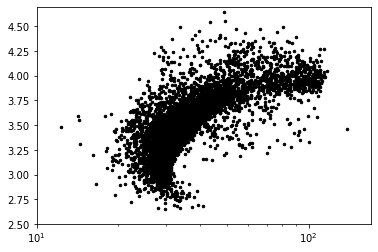

In [5]:
idx = yu["Phase"]==2
dnu, numax = yu["Delnu"][idx], yu["numax"][idx]
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.plot(numax, numax**0.75/dnu, "k.", ms=5)
ax.axis([10., 170., 2.5, 4.7])
ax.set_xscale("log")

see if there are any difference in the distribution on tnu diagram

Text(0.5, 1.0, 'Relative uncertainties of numax')

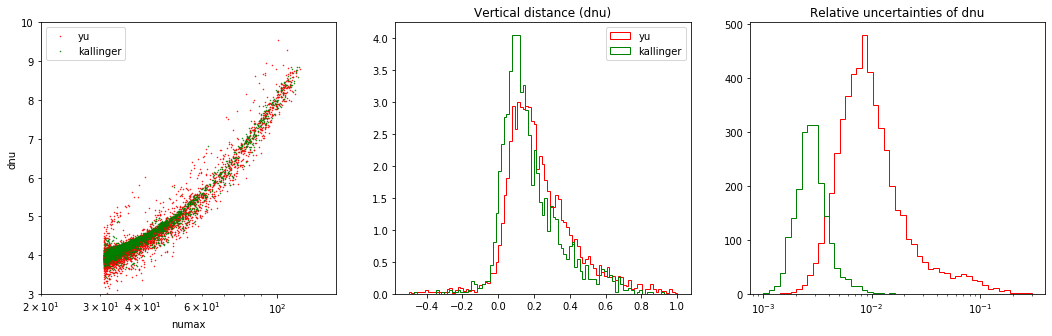

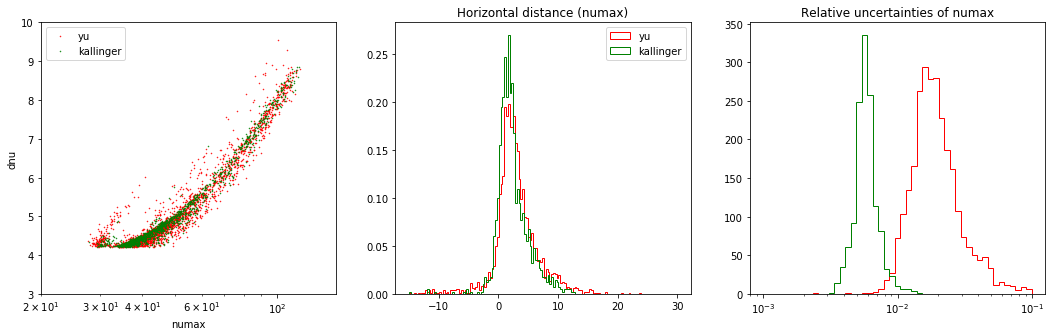

In [31]:
edges = np.load(workpath+"sample/obs/tnu_edge_samples.npy")
tck = np.load(workpath+"sample/obs/nike_spline_tck.npy", allow_pickle=True)

# yu first on Dnu
idx = (yu["Phase"]==2) & (yu["numax"]>=np.min(edges[:,0]))
dnu, numax = yu["Delnu"][idx], yu["numax"][idx]
ednu, enumax = yu["e_Delnu"][idx], yu["e_numax"][idx]
ednu, enumax = ednu/dnu, enumax/numax

# kallinger first on Dnu
ka = ascii.read(workpath+"sample/kallinger.dat", delimiter=";")
idx = (ka["evo"]>=1) & (ka["fmax"]>=np.min(edges[:,0]))
kkic = ka["ID"][idx]
kdnu, knumax = ka["dnu"][idx], ka["fmax"][idx]
kednu, kenumax = ka["dnu_e"][idx], ka["fmax_e"][idx]
kednu, kenumax = kednu/kdnu, kenumax/knumax

dist = distance_to_edge(numax, dnu, edges[:,0], edges[:,1], tck, diagram="tnu", distance="vertical")
kdist = distance_to_edge(knumax, kdnu, edges[:,0], edges[:,1], tck, diagram="tnu", distance="vertical")

fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(18,5))
axes[0].plot(numax, dnu, "r.", ms=1, label="yu")
axes[1].hist(dist, color="r", bins=np.linspace(-0.5, 1, 100), density=True, histtype="step", label="yu")
axes[0].axis([20., 150., 3.0, 10.0])
axes[0].set_xscale("log")
axes[0].set_xlabel("numax")
axes[0].set_ylabel("dnu")
logbins = np.logspace(np.log10(1*10**-3),np.log10(3*10**-1), 50)
axes[2].hist(ednu, color="r", bins=logbins, histtype="step", label="yu")

axes[0].plot(knumax, kdnu, "g.", ms=1, label="kallinger")
axes[1].hist(kdist, color="g", bins=np.linspace(-0.5, 1, 100), density=True, histtype="step", label="kallinger")
# axes[0].axis([10., 170., 2.5, 4.7])
# axes[0].set_xscale("log")
axes[1].set_title("Vertical distance (dnu)")
axes[0].legend()
axes[1].legend()
axes[2].hist(kednu, color="g", bins=logbins, histtype="step", label="kallinger")
axes[2].set_xscale("log")
axes[2].set_title("Relative uncertainties of dnu")

# for limit in [0.1, 0.25, 0.5, 1.0, 1.5]:
#     idx = dist<limit
#     kidx = kdist<limit
    
#     fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15,5))
#     axes[0].plot(numax, dnu, "k.", ms=1)
#     axes[0].plot(numax[idx], dnu[idx], "r.", ms=1)
#     logbins = np.logspace(np.log10(1*10**-3),np.log10(3*10**-1), 50)
    
#     h = ednu[idx]
#     axes[1].hist(h, bins=logbins, histtype="step", label="yu")#, bins=np.linspace(-1, 2, 100))
# #     sample = scipy.signal.resample(np.log10(h), int(len(h)/2))
# #     axes[1].hist(10.0**sample, bins=logbins)
#     h = kednu[kidx]
#     axes[1].hist(h, bins=logbins, histtype="step", label="kallinger")
#     axes[1].legend()
    
#     axes[1].set_title("Errors on Dnu (red points), vertical distance < {:0.2f}".format(limit))
#     axes[0].axis([20., 170., 2.5, 10.0])
#     axes[0].set_xscale("log")
#     axes[1].set_xscale("log")

    
    

# then on numax
idx = (yu["Phase"]==2) & (yu["Delnu"]>=np.min(edges[:,1]))
dnu, numax = yu["Delnu"][idx], yu["numax"][idx]
ednu, enumax = yu["e_Delnu"][idx], yu["e_numax"][idx]
ednu, enumax = ednu/dnu, enumax/numax

# kallinger first on Dnu
ka = ascii.read(workpath+"sample/kallinger.dat", delimiter=";")
idx = (ka["evo"]>=1) & (ka["dnu"]>=np.min(edges[:,1]))
kdnu, knumax = ka["dnu"][idx], ka["fmax"][idx]
kednu, kenumax = ka["dnu_e"][idx], ka["fmax_e"][idx]
kednu, kenumax = kednu/kdnu, kenumax/knumax

dist = distance_to_edge(numax, dnu, edges[:,0], edges[:,1], tck, diagram="tnu", distance="horizontal")
kdist = distance_to_edge(knumax, kdnu, edges[:,0], edges[:,1], tck, diagram="tnu", distance="horizontal")


fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(18,5))
axes[0].plot(numax, dnu, "r.", ms=1, label="yu")
axes[1].hist(dist, color="r", bins=np.linspace(-15, 30, 150), density=True, histtype="step", label="yu")
axes[0].axis([20., 150., 3.0, 10.0])
axes[0].set_xscale("log")
axes[0].set_xlabel("numax")
axes[0].set_ylabel("dnu")
logbins = np.logspace(np.log10(1*10**-3),np.log10(1*10**-1), 50)
axes[2].hist(enumax, color="r", bins=logbins, histtype="step", label="yu")

axes[0].plot(knumax, kdnu, "g.", ms=1, label="kallinger")
axes[1].hist(kdist, color="g", bins=np.linspace(-15, 30, 150), density=True, histtype="step", label="kallinger")
axes[1].set_title("Horizontal distance (numax)")
# axes[0].axis([10., 170., 2.5, 4.7])
# axes[0].set_xscale("log")
axes[0].legend()
axes[1].legend()
axes[2].hist(kenumax, color="g", bins=logbins, histtype="step", label="kallinger")
axes[2].set_xscale("log")
axes[2].set_title("Relative uncertainties of numax")

# for limit in [1.0, 2.0, 5.0, 10.0, 20.0]:
#     idx = dist<limit
#     kidx = kdist<limit
#     fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15,5))
#     axes[0].plot(numax, dnu, "k.", ms=1)
#     axes[0].plot(numax[idx], dnu[idx], "r.", ms=1)
#     logbins = np.logspace(np.log10(1*10**-3),np.log10(1*10**-1), 50)

#     h = enumax[idx]
#     axes[1].hist(enumax[idx], bins=logbins, histtype="step", label="yu")#, bins=np.linspace(-1, 2, 100))
# #     sample = scipy.signal.resample(np.log10(h), int(len(h)/2))
# #     axes[1].hist(10.0**sample, bins=logbins)
#     h = kenumax[kidx]
#     axes[1].hist(kenumax[kidx], bins=logbins, histtype="step", label="kallinger")
#     axes[1].legend()
    
#     axes[1].set_title("Errors on numax (red points), horizontal distance < {:0.2f}".format(limit))
#     axes[0].axis([20., 170., 2.5, 10.0])
#     axes[0].set_xscale("log")
#     axes[1].set_xscale("log")

In [22]:
# # yu first on Dnu
# idx = (yu["Phase"]==2)
# kic = yu["KIC"][idx]

# idx = (ka["evo"]>=1) 
# kkic = ka["ID"][idx]

# print(len(kic), len(kkic))
# print(len(kic[np.isin(kic, kkic)]))

7703 2804
2426


see if there are any difference in the distribution on M-R diagram

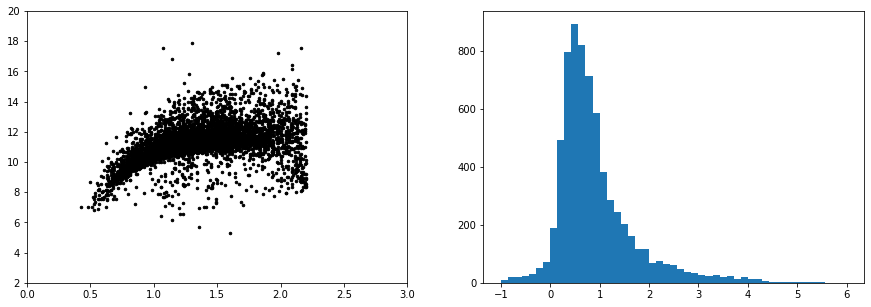

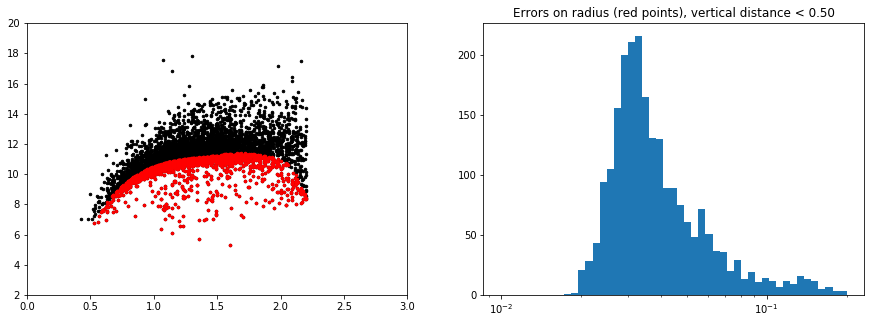

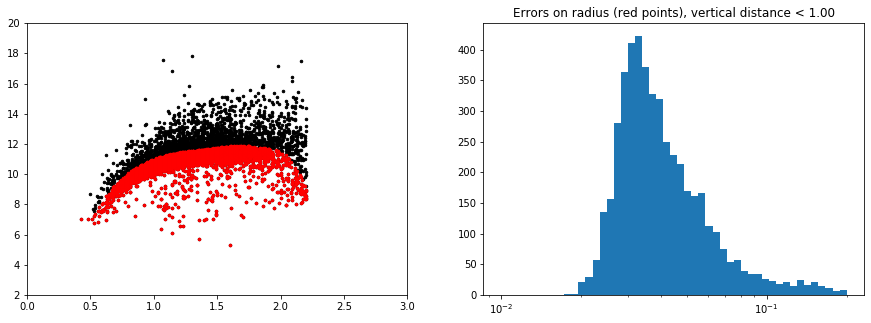

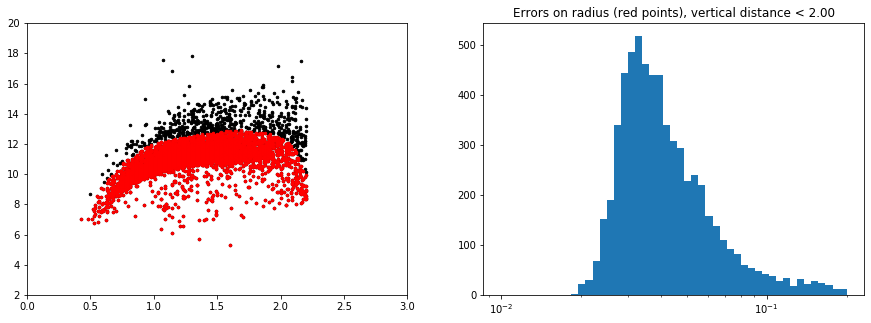

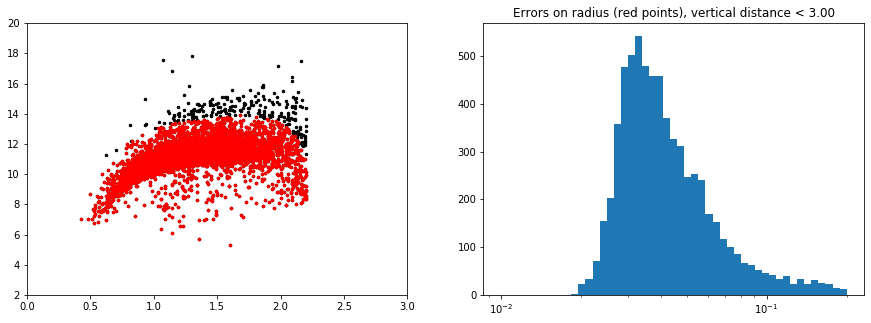

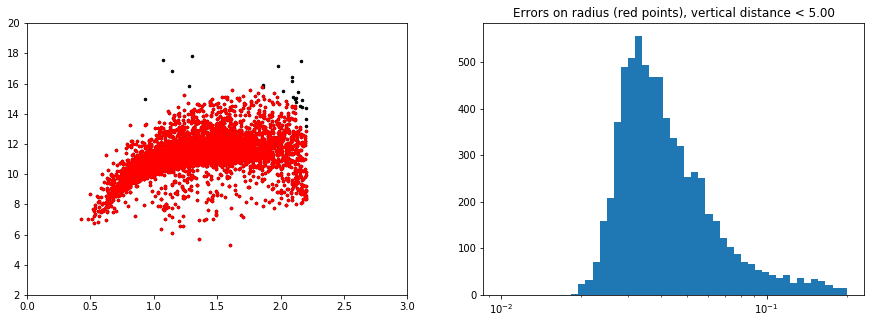

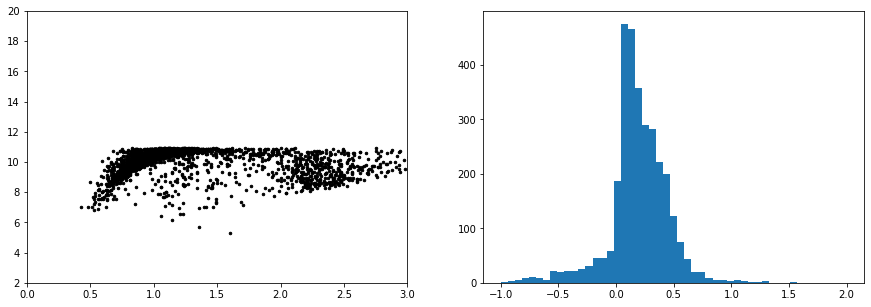

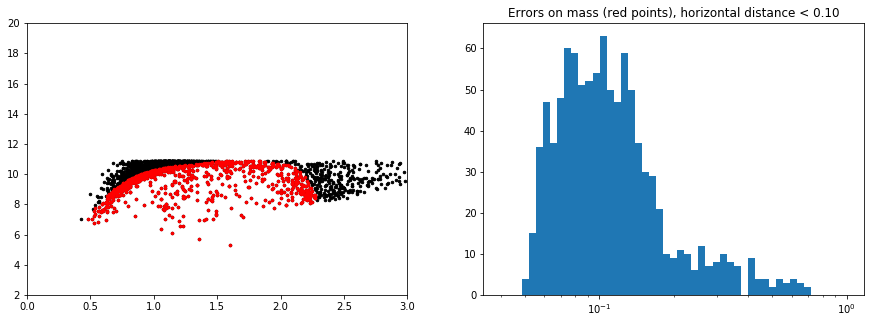

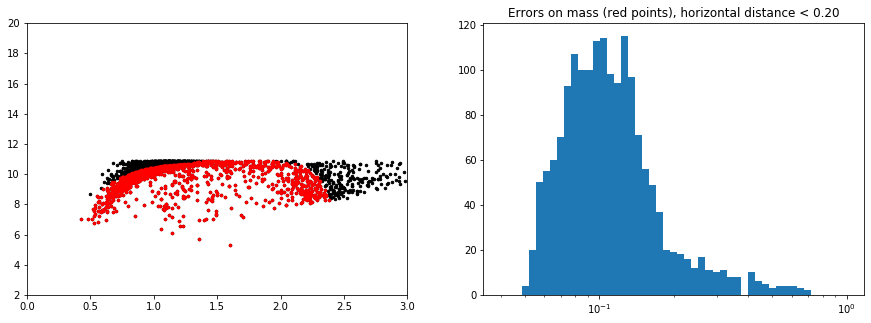

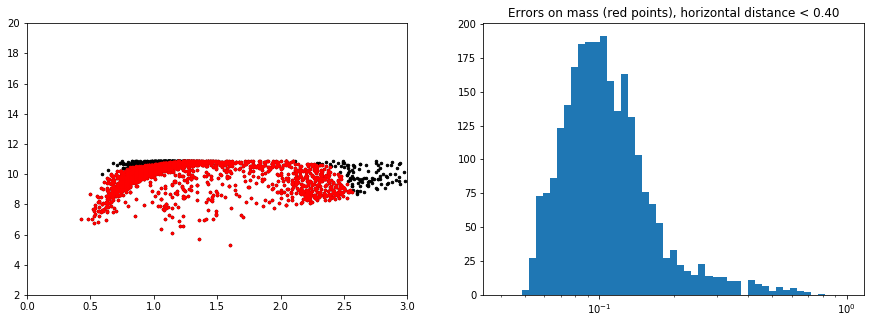

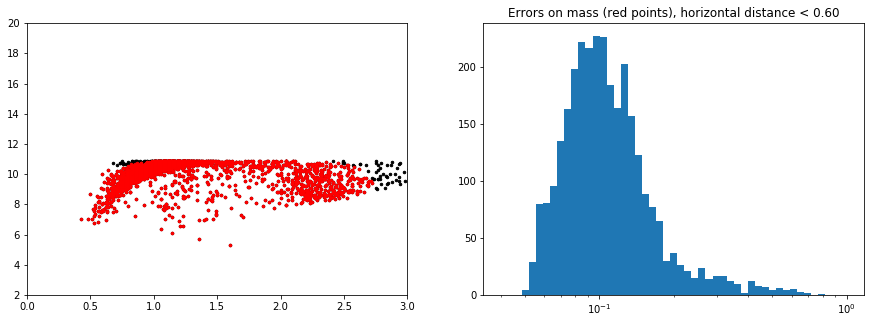

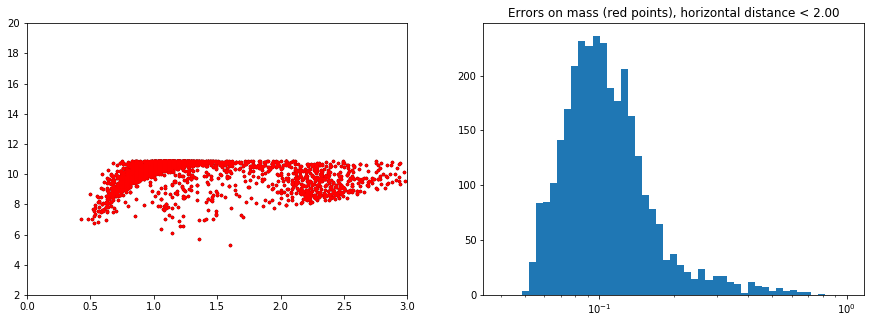

In [57]:
edges = np.load(workpath+"sample/obs/mr_edge_samples.npy")
tck = np.load(workpath+"sample/obs/mr_spline_tck.npy", allow_pickle=True)

# first on radius
idx = (yu["Phase"]==2) & (yu["ClcorM"]<=2.2)
radius, mass = yu["ClcorR"][idx], yu["ClcorM"][idx]
eradius, emass = yu["e_ClcorR"][idx], yu["e_ClcorM"][idx]
eradius, emass = eradius/radius, emass/mass

dist = distance_to_edge(mass, radius, edges[:,0], edges[:,1], tck, diagram="mr", distance="vertical")

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15,5))
axes[0].plot(mass, radius, "k.", ms=5)
axes[1].hist(dist, bins=np.linspace(-1, 6., 50))
axes[0].axis([0., 3.0 , 2., 20.0])

for limit in [0.5, 1.0, 2.0, 3.0, 5.0]:
    idx = dist<limit
    fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15,5))
    axes[0].plot(mass, radius, "k.", ms=5)
    axes[0].plot(mass[idx], radius[idx], "r.", ms=5)
    logbins = np.logspace(np.log10(10**-2),np.log10(2*10**-1), 50)
    axes[1].hist(eradius[idx], bins=logbins)#, bins=np.linspace(-1, 2, 100))
    axes[1].set_title("Errors on radius (red points), vertical distance < {:0.2f}".format(limit))
    axes[0].axis([0., 3.0 , 2., 20.0])
    axes[1].set_xscale("log")


# then on numax
idx = (yu["Phase"]==2) & (yu["ClcorR"]<=np.max(edges[:,1]))
radius, mass = yu["ClcorR"][idx], yu["ClcorM"][idx]
eradius, emass = yu["e_ClcorR"][idx], yu["e_ClcorM"][idx]
eradius, emass = eradius/radius, emass/mass

dist = distance_to_edge(mass, radius, edges[:,0], edges[:,1], tck, diagram="mr", distance="horizontal")

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15,5))
axes[0].plot(mass, radius, "k.", ms=5)
axes[1].hist(dist, bins=np.linspace(-1, 2., 50))
axes[0].axis([0., 3.0 , 2., 20.0])

for limit in [0.1, 0.2, 0.4, 0.6, 2.0]:
    idx = dist<limit
    fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15,5))
    axes[0].plot(mass, radius, "k.", ms=5)
    axes[0].plot(mass[idx], radius[idx], "r.", ms=5)
    logbins = np.logspace(np.log10(4*10**-2),np.log10(1*10**0), 50)
    axes[1].hist(emass[idx], bins=logbins)#, bins=np.linspace(-1, 2, 100))
    axes[1].set_title("Errors on mass (red points), horizontal distance < {:0.2f}".format(limit))
    axes[0].axis([0., 3.0 , 2., 20.0])
    axes[1].set_xscale("log")

# Compare error distributions

In [ ]:
numax_solar, dnu_solar, teff_solar = 3090, 135.1, 5777

def get_emass_eradius(numax, dnu, teff, enumax, ednu, eteff, numax_solar, dnu_solar, teff_solar):
    emass = ((3*(numax/numax_solar)**2. * (dnu/dnu_solar)**-4 * (teff/teff_solar)**1.5)**2. * (enumax/numax_solar)**2.
    + ((numax/numax_solar)**3. * (-4)*(dnu/dnu_solar)**-5 * (teff/teff_solar)**1.5)**2. * (ednu/dnu_solar)**2.0
    + ((numax/numax_solar)**3. * (dnu/dnu_solar)**-4 * 1.5*(teff/teff_solar)**0.5)**2. * (eteff/teff_solar)**2.0 )**0.5
    eradius = (( (dnu/dnu_solar)**-2 * (teff/teff_solar)**0.5 )**2. * (enumax/numax_solar)**2.
    + ((numax/numax_solar)**1. * (-2)*(dnu/dnu_solar)**-3 * (teff/teff_solar)**0.5)**2. * (ednu/dnu_solar)**2.0
    + ((numax/numax_solar)**1. * (dnu/dnu_solar)**-2 * 0.5*(teff/teff_solar)**-0.5)**2. * (eteff/teff_solar)**2.0 )**0.5
    return emass, eradius

fig = plt.figure(figsize=(12,6))
plt.hist(yu["e_numax"]/yu["numax"], histtype="step")